# Dataset Characteristics

Vorbereitung: Import der notwendigen Libraries und Laden des Datensatzes


In [3]:
# Import der Libraries
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
import scipy.stats as stats
import numpy as np
import seaborn as sns

# Laden des gesamten Datensatzes
dataf = pd.read_csv("https://raw.githubusercontent.com/FabsenMc/bakery_prediction/main/0_DataPreparation/dataf.csv")
print(dataf.head())

        Datum  KielerWoche  Warengruppe  Umsatz  Bewoelkung  Temperatur  \
0  2012-01-01          NaN          NaN     NaN         8.0      9.8250   
1  2012-01-02          NaN          NaN     NaN         7.0      7.4375   
2  2012-01-03          NaN          NaN     NaN         8.0      5.5375   
3  2012-01-04          NaN          NaN     NaN         4.0      5.6875   
4  2012-01-05          NaN          NaN     NaN         6.0      5.3000   

   Windgeschwindigkeit  Wettercode                    Beschreibung  FerienSH  \
0                 14.0        58.0  leichter Spruehregen mit Regen       1.0   
1                 12.0         NaN                             NaN       1.0   
2                 18.0        63.0     durchgehend maessiger Regen       1.0   
3                 19.0        80.0           leichter Regenschauer       1.0   
4                 23.0        80.0           leichter Regenschauer       1.0   

   Feiertag Uhrzeit Heim_Auswärts  Umschlag  Weihnachtsmarkt  Regen 

## Allgemeine Übersicht über den Datensatz

Beschreibung und allgemeine Zusammenfassung des Datensatzes

In [6]:

print(f"Anzahl der Reihen: {dataf.shape[0]}")
print(f"Anzahl der Spalten: {dataf.shape[1]}")
print("\nSpaltennamen und Datentypen:")
print(dataf.dtypes)
print("\nVorschau des Datensatzes:")
print(dataf.head())


#print(dataf.describe())    -> so allgemein für alles sinnvoll?

Anzahl der Reihen: 10437
Anzahl der Spalten: 20

Spaltennamen und Datentypen:
Datum                    object
KielerWoche             float64
Warengruppe             float64
Umsatz                  float64
Bewoelkung              float64
Temperatur              float64
Windgeschwindigkeit     float64
Wettercode              float64
Beschreibung             object
FerienSH                float64
Feiertag                float64
Uhrzeit                  object
Heim_Auswärts            object
Umschlag                float64
Weihnachtsmarkt         float64
Regen                     int64
Wochentag_MDMDFSS         int64
Wochenende                int64
Jahreszeit_FSHW           int64
Temperatur_Kategorie     object
dtype: object

Vorschau des Datensatzes:
        Datum  KielerWoche  Warengruppe  Umsatz  Bewoelkung  Temperatur  \
0  2012-01-01          NaN          NaN     NaN         8.0      9.8250   
1  2012-01-02          NaN          NaN     NaN         7.0      7.4375   
2  2012-01-03   

### Missing Values
Übersicht und Identifizieren von Missing Values 

In [7]:
print("\nMissing Values")
print("----------------")
missing_values = dataf.isnull().sum()
print(missing_values[missing_values > 0])


Missing Values
----------------
KielerWoche             10187
Warengruppe              1103
Umsatz                   1103
Bewoelkung                389
Temperatur                334
Windgeschwindigkeit       334
Wettercode               2856
Beschreibung             2856
FerienSH                   38
Feiertag                   38
Uhrzeit                  9531
Heim_Auswärts            9526
Umschlag                10333
Weihnachtsmarkt          9533
Temperatur_Kategorie      335
dtype: int64


Visualisierung der Variablen in Histogrammen

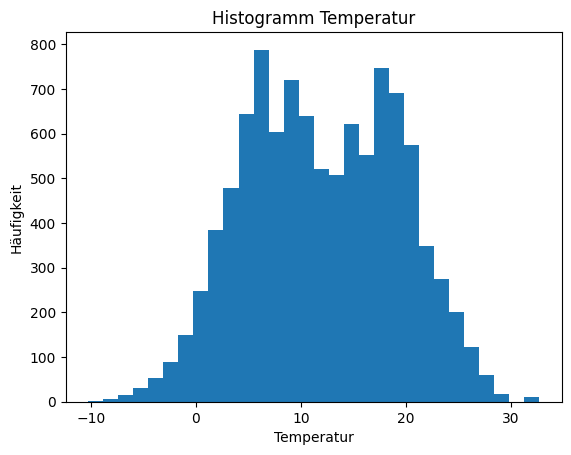

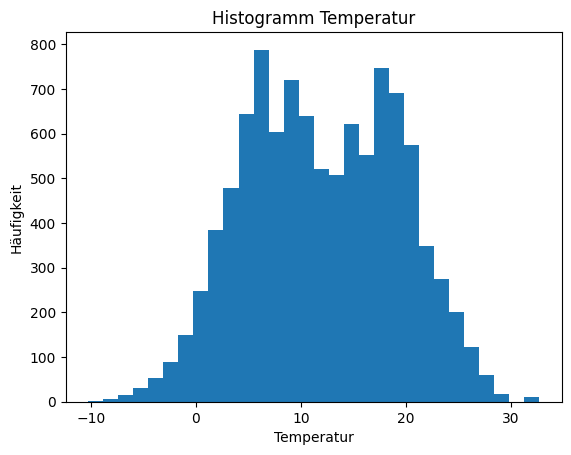

In [7]:
# Temperatur
plt.hist(dataf['Temperatur'], bins=30)
# Hinzufügen von Titeln und Labels
plt.title('Histogramm Temperatur')
plt.xlabel('Temperatur')
plt.ylabel('Häufigkeit')
plt.show()

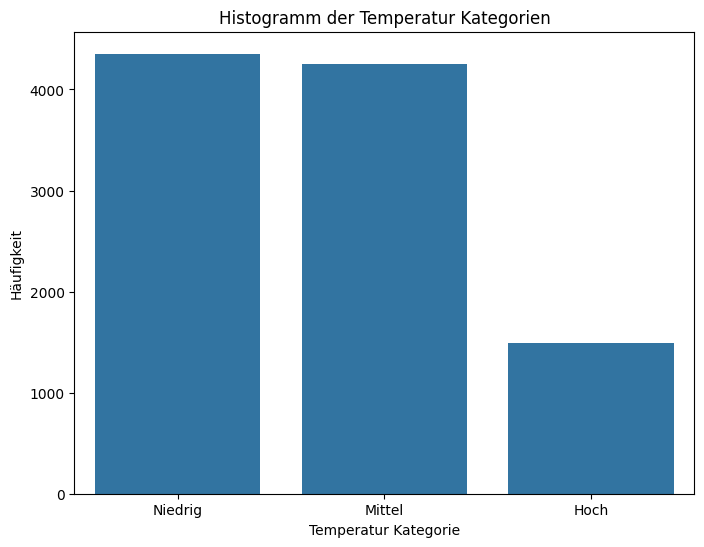

In [12]:
# Konvertieren der Variable Temperatur_Kategorie in den Kategorie-Datentyp
dataf['Temperatur_Kategorie'] = dataf['Temperatur_Kategorie'].astype('category')

# Erstellen des Histograms
plt.figure(figsize=(8, 6))
sns.countplot(data=dataf, x='Temperatur_Kategorie', order=['Niedrig', 'Mittel', 'Hoch'])
plt.xlabel('Temperatur Kategorie')
plt.ylabel('Häufigkeit')
plt.title('Histogramm der Temperatur Kategorien')
plt.show()

Umsatz

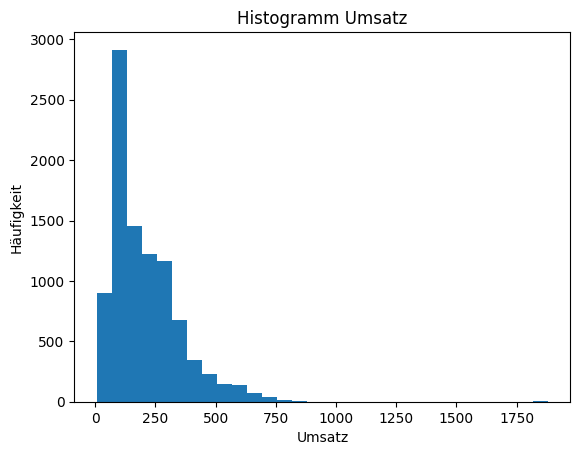

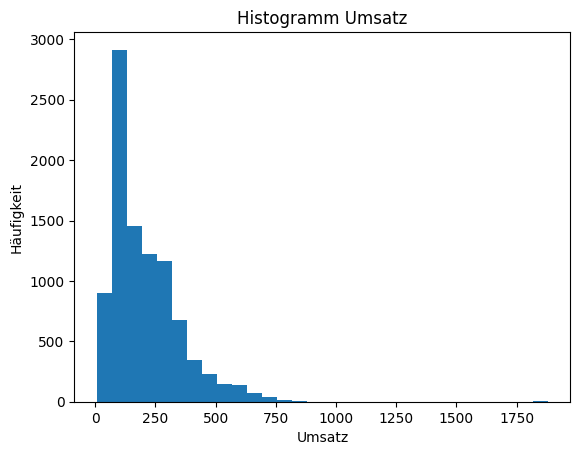

In [13]:
plt.hist(dataf['Umsatz'], bins=30)
# Hinzufügen von Titeln und Labels
plt.title('Histogramm Umsatz')
plt.xlabel('Umsatz')
plt.ylabel('Häufigkeit')
plt.show()


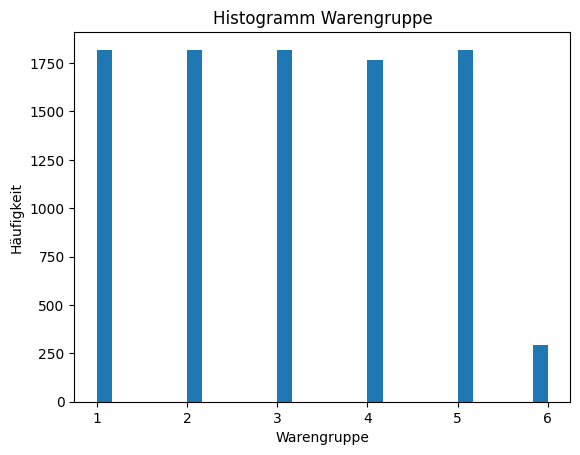

In [3]:
# Warengruppe
# Warengruppe
plt.hist(dataf['Warengruppe'].dropna(), bins=30)
# Hinzufügen von Titeln und Labels
plt.title('Histogramm Warengruppe')
plt.xlabel('Warengruppe')
plt.ylabel('Häufigkeit')
plt.show()

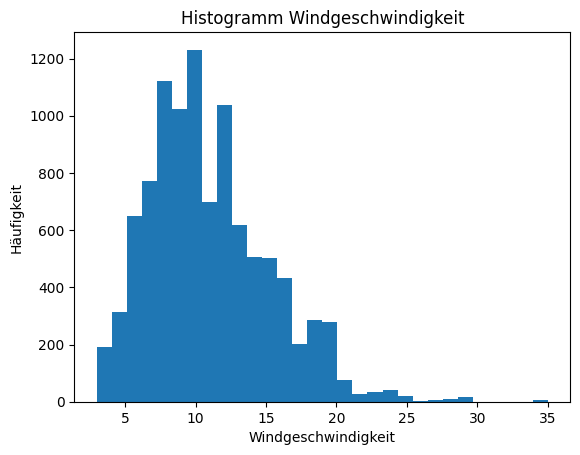

In [9]:
# Windgeschwindigkeit
plt.hist(dataf['Windgeschwindigkeit'].dropna(), bins=30)
# Hinzufügen von Titeln und Labels
plt.title('Histogramm Windgeschwindigkeit')
plt.xlabel('Windgeschwindigkeit')
plt.ylabel('Häufigkeit')
plt.show()

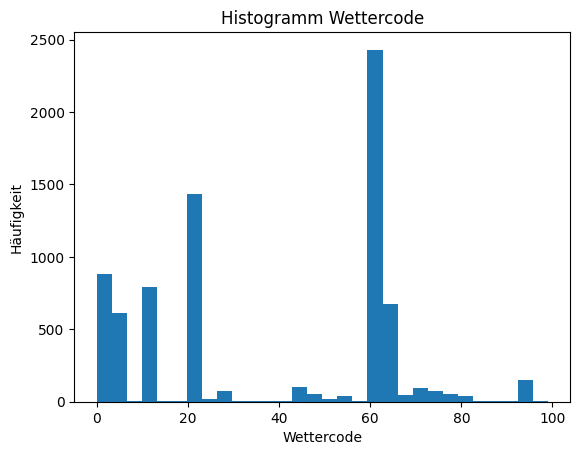

In [5]:
# Wettercode
plt.hist(dataf['Wettercode'].dropna(), bins=30)
# Hinzufügen von Titeln und Labels
plt.title('Histogramm Wettercode')
plt.xlabel('Wettercode')
plt.ylabel('Häufigkeit')
plt.show()

0        NaN
1        NaN
2        NaN
3        NaN
4        NaN
        ... 
10491    NaN
10492    NaN
10493    NaN
10494    NaN
10495    NaN
Name: Heim_Auswärts, Length: 10496, dtype: category
Categories (2, object): ['A', 'H']


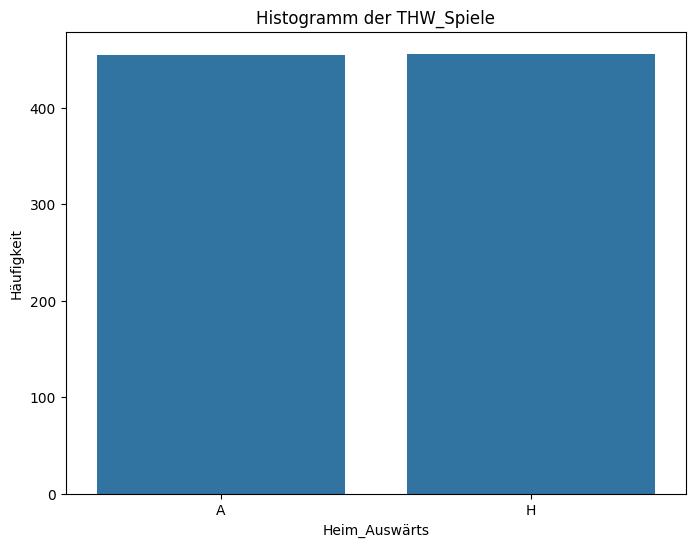

In [13]:
# THW Daten
# Konvertieren der Variable Heim_Auswärts in den Kategorie-Datentyp
dataf['Heim_Auswärts'] = dataf['Heim_Auswärts'].astype('category')

print(dataf['Heim_Auswärts'])
# Erstellen des Histograms
plt.figure(figsize=(8, 6))
sns.countplot(data=dataf, x='Heim_Auswärts', order=['A', 'H'])
plt.xlabel('Heim_Auswärts')
plt.ylabel('Häufigkeit')
plt.title('Histogramm der THW_Spiele')
plt.show()


Datum                       0
KielerWoche             10187
Warengruppe              1103
Umsatz                   1103
Bewoelkung                389
Temperatur                334
Windgeschwindigkeit       334
Wettercode               2856
Beschreibung             2856
FerienSH                   38
Feiertag                   38
Uhrzeit                  9531
Heim_Auswärts            9526
Umschlag                10333
Weihnachtsmarkt          9533
Regen                       0
Wochentag_MDMDFSS           0
Wochenende                  0
Jahreszeit_FSHW             0
Temperatur_Kategorie      335
dtype: int64


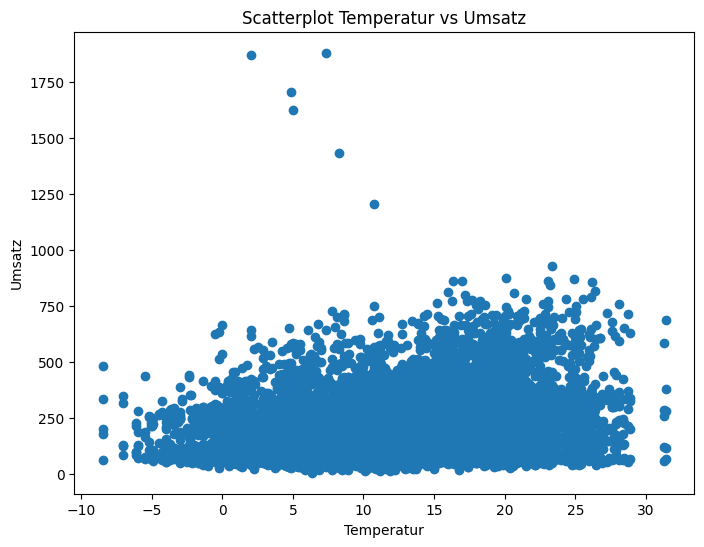

In [7]:
## SCATTERPLOTS
#Temperatur vs. Umsatz
plt.figure(figsize=(8, 6))
plt.scatter(dataf['Temperatur'], dataf['Umsatz'], label='Daten')
plt.xlabel('Temperatur')
plt.ylabel('Umsatz')
plt.title('Scatterplot Temperatur vs Umsatz')
plt.show()


In [1]:

## Aus meiner Homework
# Histogram und Grundparameter Statistik für Wettervariablen erstellen
# Liste der Wettervariablen
weather_variables = ['Bewoelkung', 'Temperatur', 'Windgeschwindigkeit', 'Wettercode']

# Schleife über jede Wettervariable
#for var in weather_variables:
    # Histogramm erstellen
    plt.hist(merged_df[var], bins=10, color='skyblue', edgecolor='black')
    plt.xlabel(var)
    plt.ylabel('Häufigkeit')
    plt.title(f'Histogramm der {var}')
    plt.grid(True)
    plt.show()
    
    # Grundlegende Parameter berechnen
    mean_var = merged_df[var].mean()
    median_var = merged_df[var].median()
    min_var = merged_df[var].min()
    max_var = merged_df[var].max()
    std_var = merged_df[var].std()
    
    # Statistische Grundparameter ausgeben
    print(f"\nStatistische Grundparameter für {var}:")
    print("Mittlerer Wert:", mean_var)
    print("Median:", median_var)
    print("Minimum:", min_var)
    print("Maximum:", max_var)
    print("Standardabweichung:", std_var)
    print("-----------------------------")

UsageError: Cell magic `%%Python` not found.
